In [266]:
import numpy as np

# 特殊函数：阶乘（factorial）、连带拉盖尔多项式（genlaguerre）、球谐函数（sph_harm）
from scipy.special import factorial, genlaguerre, sph_harm

# 等值面搜索：marching_cubes
from skimage.measure import marching_cubes

# 绘图组件
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Jupyter Notebook内嵌绘图用，本地运行则不写这一行
# %matplotlib notebook

In [267]:
# 定义约化玻尔半径a0, 原子单位下直接设置为1
a0 = 1


def hydrogen_wave_function(n, l, m):
    # 径向部分R(r), 注意genlaguerre的参数顺序
    def R(r):
        factor = np.sqrt((2. / (n * a0)) ** 3 * \
                         factorial(n - l - 1) / (2 * n * factorial(n + l)))  # 系数
        rho = 2 * r / (n * a0)  # 中间量rho
        return factor * (rho ** l) * np.exp(-rho / 2) * \
            genlaguerre(n - l - 1, 2 * l + 1)(rho)

    # 角向部分Y(theta, phi)就是球谐函数sph_harm
    # 注意量子数l与m 和 自变量theta与phi的顺序都是颠倒的！
    def Y(theta, phi):
        return sph_harm(m, l, theta, phi)

    # 径向部分R(r)和角向部分Y(theta, phi)相乘，得到一个关于(r, theta, phi)的函数，即原子轨道
    return lambda r, theta, phi: R(r) * Y(theta, phi)

In [268]:
# limit: 确定网格点的区间范围
limit_x = 20
limit_y = 20

# n_points: 每个方向上均匀取点的数目
n_points_x = 70
n_points_y = 70

# vec: 临时变量, 从 -limit 到 limit 均匀取 n_points 个点得到的向量
vec_x = np.linspace(-limit_x, limit_x, n_points_x)
vec_y = np.linspace(-limit_y, limit_y, n_points_y)


In [269]:
# 生成三维网格
# X记录每个点的x坐标，Y记录y坐标, Z记录z坐标
Y, X, Z = np.meshgrid(vec_y, vec_x, vec_x)

# print(f"{Y = }")

In [270]:
# 由坐标变换，每个格点从直角坐标系下的(X, Y, Z)变成球坐标系下的（R, THETA, PHI）
R = np.sqrt(X ** 2 + Y ** 2 + Z ** 2)
PHI = np.arccos(Z / R)
THETA = np.arctan2(Y, X)

print(f"{R.shape = }", f"{THETA.shape = }", f"{PHI.shape = }")

R.shape = (70, 70, 70) THETA.shape = (70, 70, 70) PHI.shape = (70, 70, 70)


In [271]:
# 辅助函数，每次返回一个调整好的画布`fig`和内框`ax`
def new_fig_and_ax(plot_range=10):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection="3d")

    # 设置坐标比例关系，让图像变得方正
    ax.set_box_aspect([1, 1, 1])

    # 设置合适的视图俯仰角和方位角，让坐标轴方向符合直观
    # x轴对着屏幕外方向，y轴朝右，z轴朝上
    ax.view_init(elev=30, azim=20)

    # 设置坐标轴标签
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$z$")

    # 设置坐标轴范围为[-plot_range, plot_range]
    ax.set_xlim(-plot_range, plot_range)
    ax.set_ylim(-plot_range, plot_range)
    ax.set_zlim(-plot_range, plot_range)

    # 设置坐标轴刻度
    ticks = np.linspace(-plot_range, plot_range, 5)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_zticks(ticks)

    return fig, ax

psi = <function hydrogen_wave_function.<locals>.<lambda> at 0x0000024DC03ECA40>
psi(1, np.pi/4, np.pi/3) = (1.146007187027682e-19+0.0018715717671831202j)


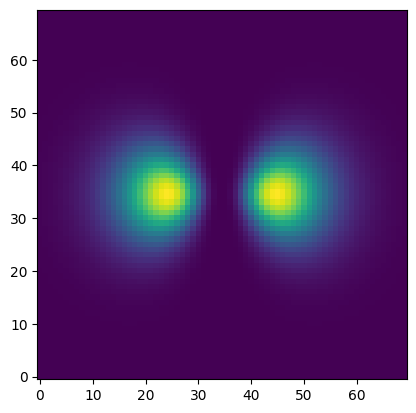

In [272]:
# 代入波函数`psi`中, 得到每个格点的波函数值
# 原子轨道参数，当前为2p0轨道
n, l, m = 3, 2, 2

# 2p0轨道波函数
psi = hydrogen_wave_function(n, l, m)

# `psi`本身是一个函数，后面还可以继续带参数(r, theta, phi)来计算实际的波函数值
print(f"{psi = }")
print(f"{psi(1, np.pi/4, np.pi/3) = }")  # 注意结果是复数
psi_values = psi(R, THETA, PHI)

prob_dens = np.abs(psi_values) ** 2
# 
# extent = np.min(vec_x), np.max(vec_x), np.min(vec_y), np.max(vec_y)
plt.imshow(prob_dens[int(n_points_x / 2), :, :].T[::-1]
           , origin='lower')  # Add color bar indicating function values
plt.show()